In [97]:
# data preprocess
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
train_appl = pd.read_csv('../data_preprocess_v3/train_apple.csv')
train_ggl = pd.read_csv('../data_preprocess_v3/train_google.csv')
train_msft = pd.read_csv('../data_preprocess_v3/train_microsoft.csv')
test_appl = pd.read_csv('../data_preprocess_v3/test_apple.csv')
test_ggl = pd.read_csv('../data_preprocess_v3/test_google.csv')
test_msft = pd.read_csv('../data_preprocess_v3/test_microsoft.csv')

In [62]:
df_train = pd.concat([train_appl,train_ggl,train_msft])
df_test = pd.concat([test_appl,test_ggl,test_msft])

In [63]:
X_train = df_train[df_train.columns[0:10]]
y_train = df_train['Close (t)']
X_test = df_test[df_test.columns[0:10]]
y_test = df_test['Close (t)']

In [70]:
#scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
# Run KNN Regressor to predict CLose(t)
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, metric='euclidean')
knn_model = knn.fit(X_train, y_train)

In [100]:
print('kNN R-squared for training set: %f' % knn_model.score(X_train, y_train))
print('kNN R-squared for test set: %f' % knn_model.score(X_test, y_test))

y_pred = knn_model.predict(X_test)
print('kNN MAE for test set: %f' % mean_absolute_error(y_test, y_pred))
print('kNN MSE for test set: %f' % mean_squared_error(y_test, y_pred, squared=True))
print('kNN RMSE for test set: %f' % mean_squared_error(y_test, y_pred, squared=False))

kNN R-squared for training set: 0.997336
kNN R-squared for test set: 0.667144
kNN MAE for test set: 131.762269
kNN MSE for test set: 63244.765824
kNN RMSE for test set: 251.485120


In [101]:
mvt_pred = np.where(y_pred > df_test['Close (t-1)'], 1, 0)
mvt_label = mvt_test = df_test['movement']

In [102]:
def evaluate_model(model, predicted, label_test):

    print("accuracy:", str(accuracy_score(label_test, predicted)))
    
    print("precision:", str(precision_score(label_test, predicted, average='weighted')))

    print("recall:", str(recall_score(label_test, predicted, average='weighted')))
   
    print("f1", str(f1_score(label_test, predicted, average='weighted')))
    
    print("metrics.roc_auc_score", str(roc_auc_score(label_test, predicted, average='weighted')))

    plot_confusion_matrix(model, predicted, label_test,
                      display_labels=list(set(label_test)),
                      cmap=plt.cm.Blues)
    
    classification = classification_report(label_test, predicted)
    print(classification)

accuracy: 0.4338138925294889
precision: 0.4954784280368635
recall: 0.4338138925294889
f1 0.41067758060544274
metrics.roc_auc_score 0.4800606226027496
              precision    recall  f1-score   support

           0       0.38      0.70      0.50       302
           1       0.57      0.26      0.36       461

    accuracy                           0.43       763
   macro avg       0.48      0.48      0.43       763
weighted avg       0.50      0.43      0.41       763



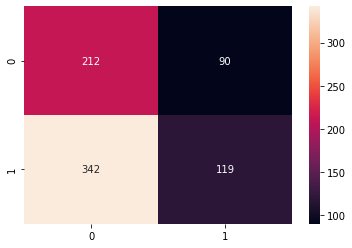

In [103]:
metric_test = evaluate(mvt_pred, mvt_label)